In [2]:
import pandas as pd

UX_df = pd.read_csv('../U_X.csv')
UY_df = pd.read_csv('../U_Y.csv')

In [3]:
UX_df.drop(columns=['Unnamed: 0'], inplace=True)
UY_df.drop(columns=['Unnamed: 0'], inplace=True)

## Ploting Solution

In [4]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Assuming df is your DataFrame with 3 lines and 2000 columns
# You can replace this with your actual DataFrame

# Example DataFrame creation
df = UX_df - UY_df

# Function to determine the color based on the row index
def get_color(row_index, max_index):
    if row_index == max_index:
        return 'red'  # Replace with your desired color for the max value
    elif row_index == max_index - 1:
        return 'green'  # Replace with your desired color for the second value
    else:
        return 'blue'  # Replace with your desired color for the last row

# Get the index of the maximum value in each column
max_indices = df.idxmax(axis=0)

# Create an interactive 3D scatter plot
fig = go.Figure()

# Plot each point with corresponding color
for col_index in range(df.shape[1]):
    x = df.iloc[0, col_index]
    y = df.iloc[1, col_index]
    z = df.iloc[2, col_index]
    color = get_color(df.idxmax(axis=0)[col_index], 2)  # Assuming 2 is the last row index

    fig.add_trace(go.Scatter3d(x=[x], y=[y], z=[z], mode='markers',
                               marker=dict(size=5, color=color),
                               name=f'Point {col_index + 1}'))

# Set labels for each axis
fig.update_layout(scene=dict(xaxis_title='UX(1) - UY(1)', yaxis_title='UX(2) - UY(2)', zaxis_title='UX(3) - UY(3)'))


# Show the interactive plot
fig.write_html("interactive_plot.html")


/var/folders/2c/w923f0zj5w34cktd76cx92n40000gq/T/ipykernel_9357/4159206504.py:31: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



## Clustering Methode

In [1]:
import os
import sys
sys.path.append("../python/")
from data import Dataloader

data_loader = Dataloader("data/dataset_10")  # Path to test dataset # _test
X, Y = data_loader.load()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
No data found at specified path data/dataset_10


In [6]:
import pandas as pd
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)

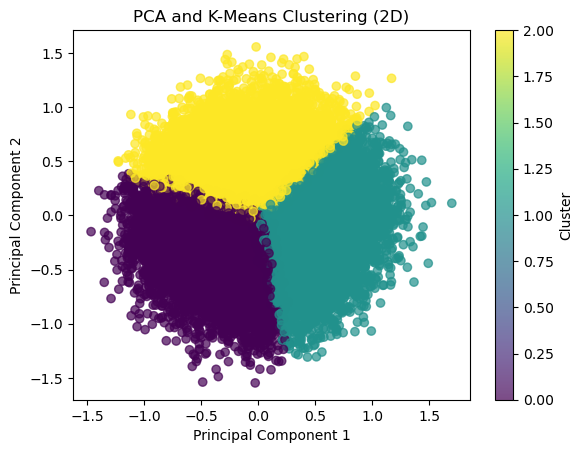

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 3 lines and 2000 columns
# You can replace this with your actual DataFrame

# Example DataFrame creation
df = X_df - Y_df

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

# Plot 2D scatter plot with clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means Clustering (2D)')
plt.colorbar(label='Cluster')

plt.show()


In [45]:
from sklearn.metrics import pairwise_distances_argmin_min

# Get cluster centroids in 2D
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Initialize a dictionary to store the indices for each cluster
cluster_indices = {i: [] for i in range(len(centroids_2d))}

for centroid_index, centroid in enumerate(centroids_2d):
    distances = np.linalg.norm(pca_result - centroid, axis=1)
    closest_points_indices = distances.argsort()[:1000]
    cluster_indices[centroid_index].extend(closest_points_indices)

In [48]:
X_training = []
Y_training = []
for key in cluster_indices:
    indexes = cluster_indices[key]
    X_training.append(X_df.iloc[indexes])
    Y_training.append(Y_df.iloc[indexes])

X_training_df = pd.concat(X_training)
Y_training_df = pd.concat(Y_training)

X_array = X_training_df.to_numpy()
Y_array = Y_training_df.to_numpy()

In [49]:
from models import HeuristicModel, TwoClustersMIP
import metrics
# Compute mins and maxs on the whole dataset
A = np.concatenate((X, Y), axis=0)
all_mins = A.min(axis=0)
all_maxs = A.max(axis=0)
# print(f"all_mins: {all_mins}\n all_maxs: {all_maxs}")

model = HeuristicModel(all_mins, all_maxs, n_clusters=3)
model.fit(X_array, Y_array)

Z_test = data_loader.get_ground_truth_labels()

# Validation on test set
# %Pairs Explained
pairs_explained = metrics.PairsExplained()
print(
    "Percentage of explained preferences:",
    pairs_explained.from_model(model, X, Y),
)

# %Cluster Intersection
cluster_intersection = metrics.ClusterIntersection()
print("% of pairs well grouped together by the model:")
print(
    "Cluster intersection for all samples:",
    cluster_intersection.from_model(model, X, Y, Z_test),
)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[rosetta2] - Darwin 23.2.0 23C71)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 42153 rows, 42180 columns and 260770 nonzeros
Model fingerprint: 0x3c036c04
Model has 9000 general constraints
Variable types: 36180 continuous, 6000 integer (6000 binary)
Coefficient statistics:
  Matrix range     [5e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 1e+00]
  GenCon rhs range [1e-03, 1e+00]
  GenCon coe range [5e-05, 1e+00]
Presolve removed 30091 rows and 18080 columns
Presolve time: 1.19s
Presolved: 12062 rows, 24100 columns, 389704 nonzeros
Presolved model has 6000 SOS constraint(s)
Variable types: 18100 continuous, 6000 integer (6000 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing prim